## imports

In [1]:
import numpy as np
import os
import scipy

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import load_img, ImageDataGenerator

2023-12-19 08:57:30.938568: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 08:57:30.941084: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 08:57:30.991220: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 08:57:30.992309: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 08:57:31.800995: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## working and loading images

In [2]:
def get_all_files_name_in_path(path: str):
    return [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]


def get_ith_image_in_path(path: str, i: int):
    items = get_all_files_name_in_path(path)
    assert i < len(items), f'i should be less than {len(items)}'
    name = items[i]
    return f'{path}/{name}'


def get_an_image_randomly_in_path(path: str):
    items = get_all_files_name_in_path(path)
    i = np.random.randint(0, len(items))
    name = items[i]
    return f'{path}/{name}'


def get_path_of_food(name: str):
    return f'./Fast Food Classification V2/Train/{name}'

In [3]:
class DecodedPrediction(object):
    def __init__(self, decode_predictions: list):
        self.decode_predictions = decode_predictions

    def get_first_prediction(self):
        return self.decode_predictions[0][0][1]

    def get_ith_prediction(self, i: int):
        return self.decode_predictions[0][i - 1][1]

In [4]:
def get_command(keras_model, keras_preprocess_input, keras_decode_predictions):
    def command(image_path: str):
        img = load_img(image_path, target_size=keras_model.input_shape[1:])
        x = np.array([np.array(img)])
        x = keras_preprocess_input(x)
        pred = keras_model.predict(x)
        return keras_decode_predictions(pred)

    return command

# Xception

In [5]:
from keras.applications import xception

In [6]:
xception_command = get_command(xception.Xception(weights='imagenet'), xception.preprocess_input,
                               xception.decode_predictions)

2023-12-19 08:57:37.531387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 08:57:37.566863: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 1s 865ms/step
xception prediction: [[('n07697313', 'cheeseburger', 0.58927184), ('n07693725', 'bagel', 0.17215282), ('n07579787', 'plate', 0.025127428), ('n07583066', 'guacamole', 0.023595905), ('n07684084', 'French_loaf', 0.009014315)]]


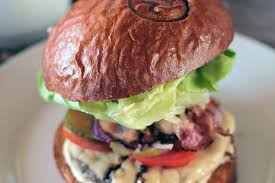

In [7]:
image_path = get_an_image_randomly_in_path(get_path_of_food('Burger'))
print('xception prediction:', xception_command(image_path))
load_img(image_path)

# MobileNet

In [8]:
from keras.applications import mobilenet

In [9]:
mobilenet_command = get_command(mobilenet.MobileNet(weights='imagenet'), mobilenet.preprocess_input,
                                mobilenet.decode_predictions)

1/1 [==============================] - 0s 158ms/step
mobilenet prediction: [[('n07695742', 'pretzel', 0.8774845), ('n13037406', 'gyromitra', 0.07124784), ('n13052670', 'hen-of-the-woods', 0.008365057), ('n01981276', 'king_crab', 0.0058278954), ('n07684084', 'French_loaf', 0.0042500617)]]


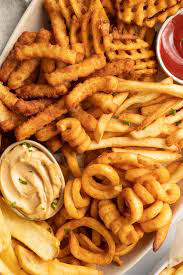

In [10]:
image_path = get_an_image_randomly_in_path(get_path_of_food('Fries'))
print('mobilenet prediction:', mobilenet_command(image_path))
load_img(image_path)

In [27]:
from keras.applications import inception_v3

In [28]:
inception_command = get_command(inception_v3.InceptionV3(weights='imagenet'), inception_v3.preprocess_input,
                                inception_v3.decode_predictions)

1/1 [==============================] - 0s 57ms/step
inception prediction: [[('n07684084', 'French_loaf', 0.9763174), ('n07716906', 'spaghetti_squash', 0.0024354954), ('n07871810', 'meat_loaf', 0.0017253227), ('n07717556', 'butternut_squash', 0.0014963939), ('n07717410', 'acorn_squash', 0.0012338024)]]


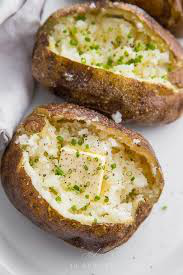

In [31]:
image_path = get_an_image_randomly_in_path(get_path_of_food('Baked Potato'))
print('inception prediction:', inception_command(image_path))
load_img(image_path)

## model + mapping from base model labels to data set labels

In [ ]:
# def add_final_mapping_layer(keras_model):
#     keras_model.trainable = False
# 
#     input_layer = keras.Input(keras_model.input_shape[1:])
#     keras_layer = keras_model(input_layer, training=False)
#     output_layer = keras.layers.Dense(10)(keras_layer)
#     model = keras.Model(input_layer, output_layer)
# 
#     return model

In [ ]:
# def learn_mapping_layer(model, keras_preprocess_input):
#     data_gen = ImageDataGenerator(preprocessing_function=keras_preprocess_input)
# 
#     train_ds = data_gen.flow_from_directory(
#         './data/Train',
#         target_size=model.input_shape[1:3],
#         batch_size=32
#     )
# 
#     val_ds = data_gen.flow_from_directory(
#         './data/Valid',
#         target_size=model.input_shape[1:3],
#         batch_size=32,
#         shuffle=False
#     )
# 
#     learning_rate = 0.01
#     optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#     loss = keras.losses.CategoricalCrossentropy(from_logits=True)
#     model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
# 
#     history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#     return model, history

In [8]:
base_model = xception.Xception(weights='imagenet')
keras_preprocess_input = xception.preprocess_input

data_gen = ImageDataGenerator(preprocessing_function=keras_preprocess_input)

base_train_generator = data_gen.flow_from_directory(
    './Fast Food Classification V2/Train',
    target_size=base_model.input_shape[1:3],
    batch_size=500
)

base_valid_generator = data_gen.flow_from_directory(
    './Fast Food Classification V2/Valid',
    target_size=base_model.input_shape[1:3],
    batch_size=500
)

Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


In [9]:
x_train = base_model.predict(base_train_generator[0][0])
y_train = base_train_generator[0][1]

x_valid = base_model.predict(base_valid_generator[0][0])
y_valid = base_valid_generator[0][1]

/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 40s 2s/step


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
wrapper = MultiOutputRegressor(lr_model)
wrapper.fit(x_train, y_train)

MultiOutputRegressor(estimator=LogisticRegression(multi_class='multinomial'))

In [26]:
wrapper.predict(x_valid)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
input_layer = keras.Input(base_model.output_shape[1:])
map_layer = keras.layers.Dense(10, activation='relu')(input_layer)
map_model = keras.Model(input_layer, map_layer)

In [13]:
# map_model_input = base_model.predict(base_train_generator[0][0])

In [14]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
map_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

print(map_model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 10010 (39.10 KB)
Trainable params: 10010 (39.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [15]:
# modified_exception = add_final_mapping_layer(
#     xception.Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3)))

In [16]:
# learn_mapping_layer(modified_exception, xception.preprocess_input)

In [17]:
# Data generator for the second neural network
def custom_data_generator(base_data_generator):
    for batch in base_data_generator:
        features = base_model.predict(batch[0])
        labels = batch[1]
        yield features, labels

In [ ]:
map_model.fit(
    custom_data_generator(base_train_generator),
    steps_per_epoch=len(base_train_generator),
    validation_data=custom_data_generator(base_valid_generator)
)

16/16 [==============================] - 69s 4s/step


In [ ]:
keras.models.save_model(map_model, 'map_first_draft.h5')

In [ ]:
class CustomModel(object):
    def __init__(self, base_model, map_model):
        self.base_model = base_model
        self.map_model = map_model
        self.input_shape = self.base_model.input_shape

    def predict(self, x):
        return self.map_model.predict(self.base_model.predict(x))


dir_path = './Fast Food Classification V2/Train/'
classes = [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]


def my_decode_prediction(pred):
    return dict(zip(classes, pred[0]))

In [ ]:
my_command = get_command(CustomModel(base_model, map_model), xception.preprocess_input, my_decode_prediction)
image_path = get_an_image_randomly_in_path(get_path_of_food('Burger'))
print('xception prediction:', my_command(image_path))
load_img(image_path)

In [ ]:
my_decode_prediction([[-1.7575898, 1.104011, -1.5568761, -1.2263432, -0.41464752, -1.5358437,
                       -1.7239212, -0.743358, -1.7970042, -1.8490225]])